### Use the following code with Google Colab

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# To avoid waiting very long, you have to unzip in the colab session
# make sure the zip file of the dataset is in the root of your google drive as hi_paris_ds.zip

!cp /content/drive/MyDrive/hi_paris_ds.zip .
!unzip hi_paris_ds.zip

In [ ]:
!pip install ultralytics


Don't forget to set the data.yaml paths correctly !
```
overwrite data.yaml

train: /content/DS-71c1fd51-v2/images/train

val: /content/DS-71c1fd51-v2/images/val
```

In [ ]:

from ultralytics import YOLO


# Load the small YOLO11 model for Detection
model = YOLO("yolo11s.pt")

# https://docs.ultralytics.com/modes/train/#train-settings

# List of hyperparams we want to fine-tune or that are important

# model : stick with the small one to save time : yolo11s (and benefit from transfer learning)
# epochs : total number of epochs
# patience : set it to 20 to avoid useless waiting times (early stopping)
# batch : stick with 64
# device : 0 to use GPU
# optimzer : stick with AdamW
# seed : fix it for reproducibility
# close_mosaic : the last N epochs should not use mosaic data aug to stabilize the end of training
# fraction : 0.15 to save time for the first experiments, then increase it at the end
# lr0 : To finetune : controls learning rate scheduling
# lrf : To finetune : controls learning rate scheduling
# momentum : To finetune : with AdamW it plays with the learning rate
# weight_decay : can help fight overfitting
# plots : True to see the training plots

#DATA AUGMENTATION

#degrees : a bit of rotation (range -180 to 180)
#mosaic : leave it enabled but not for the last epochs (cf. close_mosaic)
#hsv_h : bump it up to 0.05 to increase the range of hue changes

#misc
#cls : don't really care about classification loss as only 1 class

# Train the model
train_results = model.train(
    model = 'yolo11s.pt',
    data="./DS-71c1fd51-v2/data.yaml",  # path to dataset YAML
    epochs=40,  # number of training epochs
    patience=25,
    optimizer='AdamW',
    close_mosaic = 7,
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    fraction = 0.5,
    batch = 64,
    plots = True,
    lr0 = 4e-5,
    lrf = 0.020,
    seed=42,
    degrees = 30,
    weight_decay = 0.001,
    momentum = 0.15, #reduced for more smooth convergence
    cls = 0.1,
    hsv_h = 0.05 #default is 0.015
)


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=./DS-71c1fd51-v2/data.yaml, epochs=40, time=None, patience=25, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=7, resume=False, amp=True, fraction=0.5, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/DS-71c1fd51-v2/labels/train.cache... 3177 images, 175 backgrounds, 0 corrupt: 100%|██████████| 3352/3352 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/DS-71c1fd51-v2/labels/val.cache... 1529 images, 170 backgrounds, 0 corrupt: 100%|██████████| 1699/1699 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: AdamW(lr=4e-05, momentum=0.15) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      16.3G      2.223     0.9077      1.678         49        640: 100%|██████████| 53/53 [00:39<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.295     0.0383     0.0495     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      16.1G      1.948     0.4145      1.415         43        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]


                   all       1699       1540      0.431      0.319      0.295      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      16.1G      1.825      0.356      1.325         38        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]

                   all       1699       1540      0.521      0.404      0.421      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      16.1G      1.718     0.3214      1.274         42        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]

                   all       1699       1540      0.554      0.432      0.458      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      16.1G        1.7     0.3135       1.27         32        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.636      0.417       0.48      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      16.1G      1.657     0.2952      1.246         44        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.593       0.45      0.486      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      16.1G      1.633      0.289      1.226         40        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]

                   all       1699       1540      0.596      0.444      0.474      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      16.1G      1.588     0.2753      1.216         34        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540      0.623      0.438      0.489      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      16.1G       1.59     0.2723      1.202         38        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.664      0.412       0.48      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      16.1G      1.571     0.2657      1.201         47        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540       0.59      0.479      0.492      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      16.1G      1.559     0.2639      1.194         36        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540      0.615      0.453      0.494      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      16.1G      1.528     0.2535       1.18         41        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all       1699       1540      0.586      0.466      0.496      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      16.1G      1.528     0.2497      1.172         27        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.631      0.458      0.503      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      16.1G      1.504     0.2463      1.174         54        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.598       0.47      0.505      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      16.1G      1.471     0.2362      1.157         38        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.643       0.47       0.52       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      16.1G      1.479      0.235      1.154         46        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all       1699       1540      0.642      0.439      0.503      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      16.1G      1.482     0.2339       1.15         35        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all       1699       1540      0.566      0.463      0.499      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      16.1G      1.459     0.2374      1.144         41        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.635      0.464      0.512       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      16.1G      1.433     0.2297       1.14         34        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.638      0.468      0.529      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      16.1G      1.408     0.2251      1.135         37        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540      0.626      0.458      0.513      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      16.1G      1.419     0.2191      1.123         39        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.622      0.469      0.517      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      16.1G      1.422     0.2219      1.122         44        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all       1699       1540      0.643      0.478      0.527      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      16.1G      1.388     0.2181      1.115         39        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]

                   all       1699       1540      0.623      0.463      0.507      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      16.1G      1.381     0.2111      1.118         35        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all       1699       1540      0.651      0.457      0.514      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      16.1G      1.382     0.2182      1.103         46        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.648      0.451      0.511      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      16.1G      1.382      0.217      1.106         34        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all       1699       1540      0.636      0.486       0.53      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      16.1G      1.373     0.2102      1.106         44        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540       0.63      0.463      0.516      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      16.1G      1.369     0.2096        1.1         45        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540       0.62       0.46      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      16.1G      1.337     0.2067      1.099         43        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all       1699       1540      0.647      0.455      0.517      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      16.1G      1.344     0.2087      1.089         39        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all       1699       1540      0.619      0.465      0.524      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      16.1G      1.338      0.207      1.092         44        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.643      0.456      0.523      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      16.1G      1.332     0.2023      1.081         41        640: 100%|██████████| 53/53 [00:38<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

                   all       1699       1540      0.619      0.453      0.522      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      16.1G      1.338      0.205      1.082         47        640: 100%|██████████| 53/53 [00:38<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all       1699       1540      0.657      0.441      0.527      0.287


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      16.1G      1.311      0.194      1.073         24        640: 100%|██████████| 53/53 [00:39<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all       1699       1540      0.609      0.471      0.504      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      16.1G      1.286     0.1895      1.064         21        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.651      0.462       0.52      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      16.1G      1.297       0.19      1.071         23        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.602      0.484      0.511      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      16.1G       1.26      0.186      1.052         23        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all       1699       1540      0.627      0.472       0.51      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      16.1G      1.268     0.1847      1.064         24        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all       1699       1540       0.63      0.469      0.516      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      16.1G      1.263     0.1813      1.054         24        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all       1699       1540      0.621       0.48      0.515      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      16.1G      1.276     0.1838      1.056         21        640: 100%|██████████| 53/53 [00:37<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all       1699       1540      0.615      0.482      0.517      0.277



40 epochs completed in 0.529 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 19.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]


                   all       1699       1540      0.639      0.468      0.529      0.288
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train4


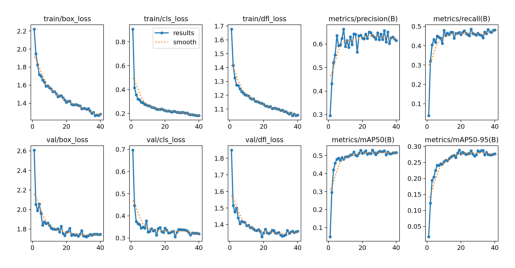

In [ ]:
# view the final training plots with the latest hyperparameters
# this is saved as result.png because we set plots = True

# Training is done ! See the validation notebook now and / or the inference script